In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
from pyclustertend import hopkins, vat, ivat
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/envs/py19/lib/python3.6/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.clusterability.hopkins import hopkins_statistic

In [4]:
datasets = list(DATA_DIR.glob('embeddings/*/*.pickle'))
len(datasets)

83

In [5]:
def remove_outliers(z, pct = 99.5):
    """ GPU based UMAP algorithm produces some outliers that UMAP does not, but is much faster
    this is a quick fix for that. 
    """
    _min = np.percentile(z, (100-pct), axis=0)
    _max = np.percentile(z, pct, axis=0)
    for col in range(np.shape(z)[1]):
        mask = z[:,col] < _min[col]
        z[mask,col] = _min[col]
        mask = z[:,col] > _max[col]
        z[mask,col] = _max[col]
    return z

In [7]:
pd.read_pickle(dataset)

,start_time,end_time,indv,indvi,key,rate,spectrogram,umap
0,0.124,0.134,VOC592,0,VOC592_VOC577_SONG_CMPA_9_15_2016_51_23.39,250000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2.631598711013794, 0.01015306357294321]"
1,0.372,0.382,VOC592,0,VOC592_VOC577_SONG_CMPA_9_15_2016_51_23.39,250000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1.428209662437439, 2.367553949356079]"
2,0.428,0.448,VOC592,0,VOC592_VOC577_SONG_CMPA_9_15_2016_51_23.39,250000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1.0368598699569702, 1.704635500907898]"
3,0.854,0.864,VOC592,0,VOC592_VOC577_SONG_CMPA_9_15_2016_51_23.39,250000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.8644900918006897, 2.708207368850708]"
4,2.424,2.434,VOC592,0,VOC592_VOC577_SONG_CMPA_9_15_2016_51_23.39,250000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.6010725498199463, 3.0031702518463135]"
5,2.540,2.552,VOC592,0,VOC592_VOC577_SONG_CMPA_9_15_2016_51_23.39,250000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1.805801510810852, 1.6371140480041504]"
6,2.586,2.596,VOC592,0,VOC592_VOC577_SONG_CMPA_9_15_2016_51_23.39,250000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2.412652015686035, -0.07685692608356476]"
7,2.616,2.630,VOC592,0,VOC592_VOC577_SONG_CMPA_9_15_2016_51_23.39,250000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2.4797184467315674, -1.6716333627700806]"
8,2.680,2.704,VOC592,0,VOC592_VOC577_SONG_CMPA_9_15_2016_51_23.39,250000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2.187494993209839, 0.4497935473918915]"
9,4.008,4.034,VOC592,0,VOC592_VOC577_SONG_CMPA_9_15_2016_51_23.39,250000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2.449019193649292, 1.4581661224365234]"


In [6]:
clusterability_df = pd.DataFrame(columns=[
    'df', 'dataset', 'indv', 'hopkins_10', 'hopkins_100', 'hopkins_pct_0.1',
    'hopkins_pct_1', 'hopkins_pct_5', 'hopkins_pct_10', 'hopkins_statistic', 'hopkins_statistic_flip'
])
for dataset in tqdm(datasets):
    ds = pd.read_pickle(dataset)
    specs = np.stack(ds[['spectrogram']].spectrogram.values)
    specs = specs.reshape(len(specs),-1)
    specs = scale(specs)
    
    umap_proj = np.vstack(ds[['umap']].umap.values)
    umap_proj = remove_outliers(umap_proj, pct=99.5)
    umap_proj = scale(umap_proj)
    asdf
    print(dataset, np.shape(umap_proj))
    fig, ax = plt.subplots()
    ax.scatter(umap_proj[:, 0], umap_proj[:, 1], s=1, color='k', alpha=0.1)
    plt.show()
    
    hopkins_stat = hopkins_statistic(umap_proj)
    hopkins_stat_flip = hopkins_statistic(umap_proj, flip=True)
    
    hopkins_dict = {
        'prop': {
            0.1: hopkins(umap_proj,
                         int(np.ceil(len(umap_proj) * (0.1 / 100)))),
            1: hopkins(umap_proj, int(np.ceil(len(umap_proj) * (1 / 100)))),
            5: hopkins(umap_proj, int(np.ceil(len(umap_proj) * (5 / 100)))),
            10: hopkins(umap_proj, int(np.ceil(len(umap_proj) * (10 / 100))))
        }
    }

    clusterability_df.loc[len(clusterability_df)] = [
        dataset, dataset.parent.stem, dataset.stem, hopkins_dict['abs'][10], hopkins_dict['abs'][100],
        hopkins_dict['pct'][0.1], hopkins_dict['pct'][1], hopkins_dict['pct'][5], hopkins_dict['pct'][10], hopkins_stat, hopkins_stat_flip
    ]

NameError: name 'asdf' is not defined

In [11]:
clusterability_df[:3]

,df,dataset,indv,hopkins_10,hopkins_100,hopkins_pct_0.1,hopkins_pct_1,hopkins_pct_5,hopkins_pct_10,hopkins_statistic,hopkins_statistic_flip
0,/local/home/tsainbur/github_repos/avgn_paper/d...,castellucci_mouse_usv_segmented,VOC592,0.085151,0.055631,0.022910,0.053729,0.053126,0.059182,0.949230,0.048536
1,/local/home/tsainbur/github_repos/avgn_paper/d...,castellucci_mouse_usv_segmented,VOC591,0.026024,0.030948,0.028820,0.038196,0.030141,0.029843,0.970945,0.028549
2,/local/home/tsainbur/github_repos/avgn_paper/d...,castellucci_mouse_usv_segmented,VOC597,0.078855,0.060868,0.047744,0.077746,0.037991,0.060124,0.943913,0.056991


In [12]:
clusterability_df.dataset.unique()

array(['castellucci_mouse_usv_segmented', 'BIRD_DB_Vireo_cassinii',
       'gibbon_morita_segmented', 'bengalese_finch_sober',
       'BIRD_DB_Toxostoma_redivivum', 'buckeye', 'swamp_sparrow',
       'mobysound_humpback_whale', 'koumura_bengalese_finch',
       'katahira_white_munia_segmented', 'zebra_finch_gardner_segmented',
       'giant_otter', 'european_starling_gentner_segmented'], dtype=object)

In [13]:
species_dict = {
    'castellucci_mouse_usv_segmented': {
        'species': 'Mouse',
        'group': 'mammal'
    },
    'BIRD_DB_Vireo_cassinii': {
        'species': 'Cassin\'s vireo',
        'group': 'songbird'
    },
    'gibbon_morita_segmented': {
        'species': 'Gibbon',
        'group': 'mammal'
    },
    'bengalese_finch_sober': {
        'species': 'Bengalese finch',
        'group': 'songbird'
    },
    'buckeye': {
        'species': 'Human (English)',
        'group': 'mammal'
    },
    'swamp_sparrow': {
        'species': 'Swamp sparrow',
        'group': 'songbird'
    },
    'mobysound_humpback_whale': {
        'species': 'Humpback whale',
        'group': 'mammal'
    },
    'koumura_bengalese_finch': {
        'species': 'Bengalese finch',
        'group': 'songbird'
    },
    'giant_otter': {
        'species': 'Giant otter',
        'group': 'mammal'
    },
    'BIRD_DB_Toxostoma_redivivum': {
        'species': 'California thrasher',
        'group': 'songbird'
    },
    'zebra_finch_gardner_segmented': {
        'species': 'Zebra finch',
        'group': 'songbird'
    },
    'katahira_white_munia_segmented': {
        'species': 'White-rumped munia',
        'group': 'songbird'
    },
    'european_starling_gentner_segmented': {
        'species': 'European starling',
        'group': 'songbird'
    },
}

In [14]:
clusterability_df['species'] = [species_dict[ds]['species']  for ds in clusterability_df['dataset'].values]
clusterability_df['family'] = [species_dict[ds]['group']  for ds in clusterability_df['dataset'].values]

In [18]:
import seaborn as sns

In [19]:
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

(0.5, 1)

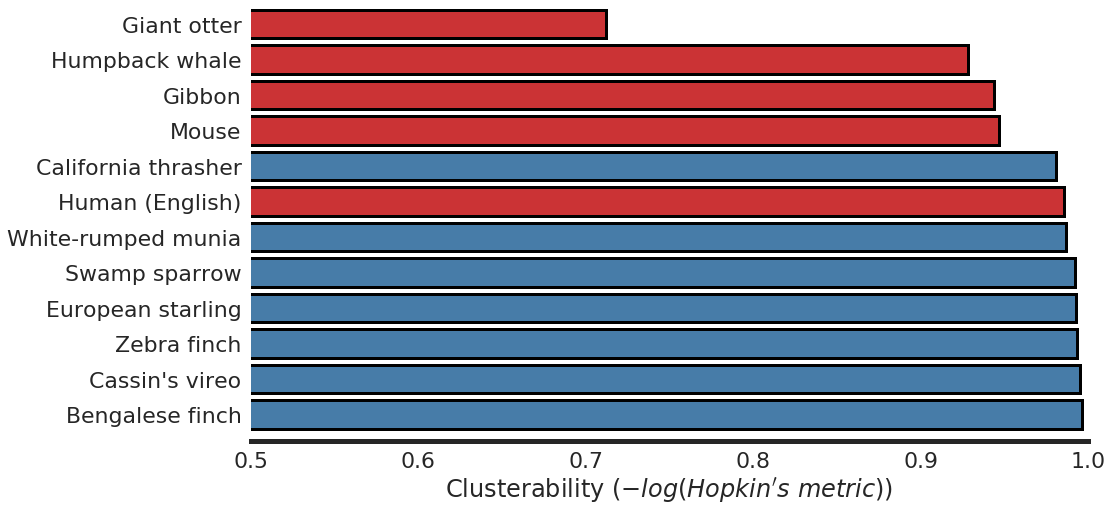

In [29]:
sns.set(style='white', font_scale=2)

metric = 'hopkins_statistic'

fig, ax = plt.subplots(ncols=1, figsize=(15, 8))

# log scale
result = clusterability_df.groupby(["species", 'family'])[metric].aggregate(
    np.median).reset_index().sort_values(metric)
#result[metric] = -np.log(result[metric])

# create bar chart
bar = sns.barplot(
    x=metric,
    y="species",
    hue='family',
    dodge=False,
    data=result,
    ax=ax,
    linewidth=3,
    edgecolor="0",
    order=result['species'],
    #log=True,
    #width = 1,
    palette = sns.color_palette('Set1')
)
ax.set_xlabel('Clusterability ($\it{-log(Hopkin\'s\ metric)}$)', fontsize=24)
ax.set_ylabel('')
ax.get_legend().remove()

for axis in ['top','left','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(5)

ylim = ax.get_ylim()
ax.set_ylim([ylim[0]+.25, ylim[1]])
ax.set_xlim([0.5,1])
#save_fig(FIGURE_DIR / 'hopkins_comparison', dpi=300, save_jpg=False, save_png=True)

(11.75, -0.5)

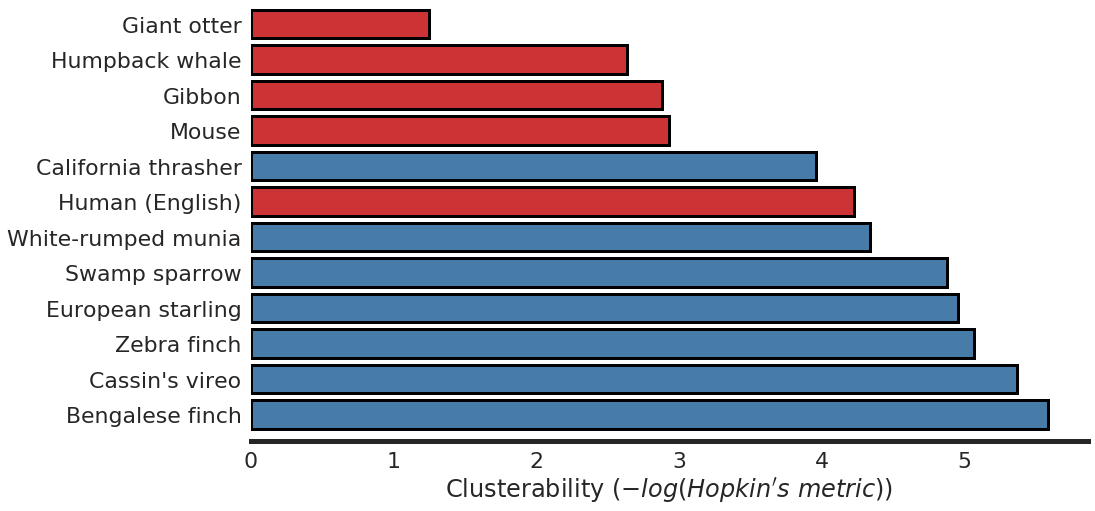

In [26]:
sns.set(style='white', font_scale=2)

metric = 'hopkins_statistic'

fig, ax = plt.subplots(ncols=1, figsize=(15, 8))

# log scale
result = clusterability_df.groupby(["species", 'family'])[metric].aggregate(
    np.median).reset_index().sort_values(metric)
result[metric] = -np.log(1 - result[metric])

# create bar chart
bar = sns.barplot(
    x=metric,
    y="species",
    hue='family',
    dodge=False,
    data=result,
    ax=ax,
    linewidth=3,
    edgecolor="0",
    order=result['species'],
    #log=True,
    #width = 1,
    palette = sns.color_palette('Set1')
)
ax.set_xlabel('Clusterability ($\it{-log(Hopkin\'s\ metric)}$)', fontsize=24)
ax.set_ylabel('')
ax.get_legend().remove()

for axis in ['top','left','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(5)

ylim = ax.get_ylim()
ax.set_ylim([ylim[0]+.25, ylim[1]])
#ax.set_xlim([0.5,1])
#save_fig(FIGURE_DIR / 'hopkins_comparison', dpi=300, save_jpg=False, save_png=True)

In [ ]:
sns.set(style='white', font_scale=2)

metric = 'hopkins_statistic_flip'

fig, ax = plt.subplots(ncols=1, figsize=(15, 8))

# log scale
result = clusterability_df.groupby(["species", 'family'])[metric].aggregate(
    np.median).reset_index().sort_values(metric)
#result[metric] = -np.log(result[metric])

# create bar chart
bar = sns.barplot(
    x=metric,
    y="species",
    hue='family',
    dodge=False,
    data=result,
    ax=ax,
    linewidth=3,
    edgecolor="0",
    order=result['species'],
    #log=True,
    #width = 1,
    palette = sns.color_palette('Set1')
)
ax.set_xlabel('Clusterability ($\it{-log(Hopkin\'s\ metric)}$)', fontsize=24)
ax.set_ylabel('')
ax.get_legend().remove()

for axis in ['top','left','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(5)

ylim = ax.get_ylim()
ax.set_ylim([ylim[0]+.25, ylim[1]])
axs.set_xscale('log')
#ax.set_xlim([0.5,1])
#save_fig(FIGURE_DIR / 'hopkins_comparison', dpi=300, save_jpg=False, save_png=True)

(11.75, -0.5)

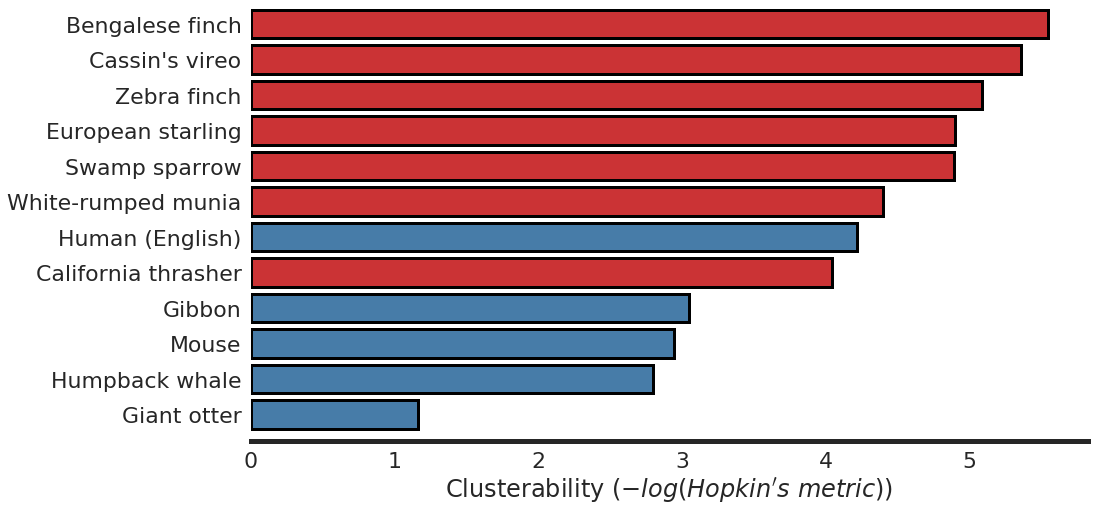

In [28]:
sns.set(style='white', font_scale=2)

metric = 'hopkins_statistic_flip'

fig, ax = plt.subplots(ncols=1, figsize=(15, 8))

# log scale
result = clusterability_df.groupby(["species", 'family'])[metric].aggregate(
    np.median).reset_index().sort_values(metric)
result[metric] = -np.log(result[metric])

# create bar chart
bar = sns.barplot(
    x=metric,
    y="species",
    hue='family',
    dodge=False,
    data=result,
    ax=ax,
    linewidth=3,
    edgecolor="0",
    order=result['species'],
    #log=True,
    #width = 1,
    palette = sns.color_palette('Set1')
)
ax.set_xlabel('Clusterability ($\it{-log(Hopkin\'s\ metric)}$)', fontsize=24)
ax.set_ylabel('')
ax.get_legend().remove()

for axis in ['top','left','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(5)

ylim = ax.get_ylim()
ax.set_ylim([ylim[0]+.25, ylim[1]])
#ax.set_xlim([0.5,1])
#save_fig(FIGURE_DIR / 'hopkins_comparison', dpi=300, save_jpg=False, save_png=True)

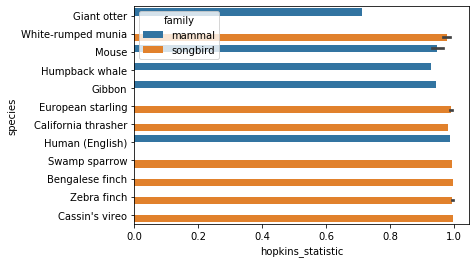

In [16]:
metric = 'hopkins_statistic'
sns.barplot(x=metric,
            y="species",
            hue='family',
            data=clusterability_df.sort_values(by=metric),
            )

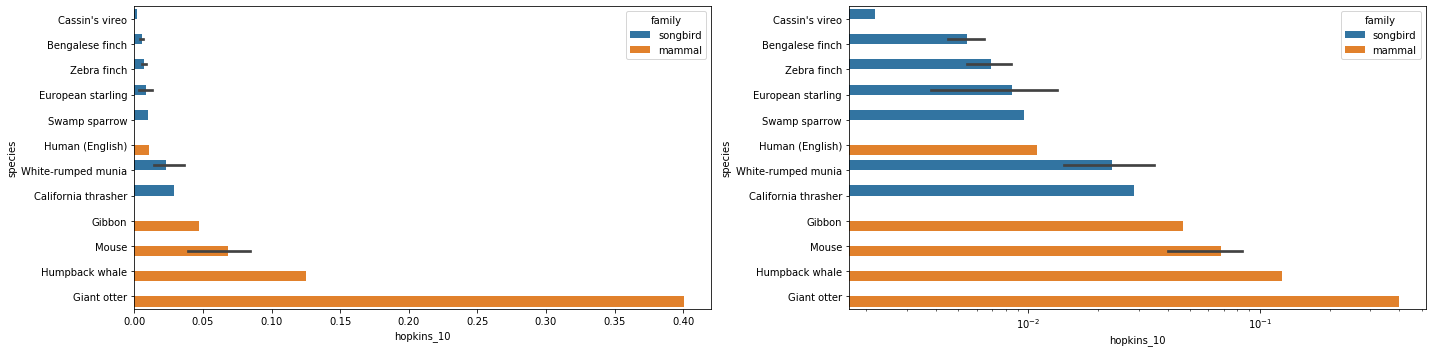

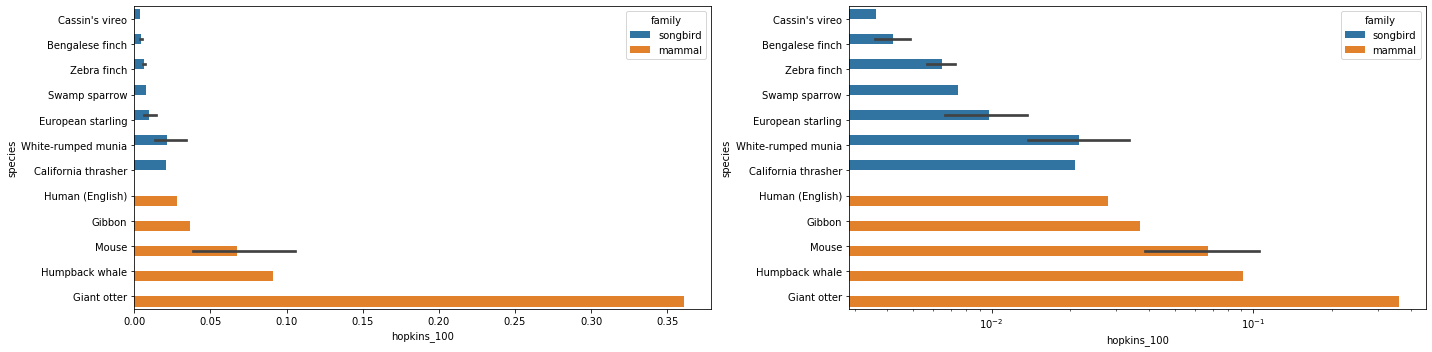

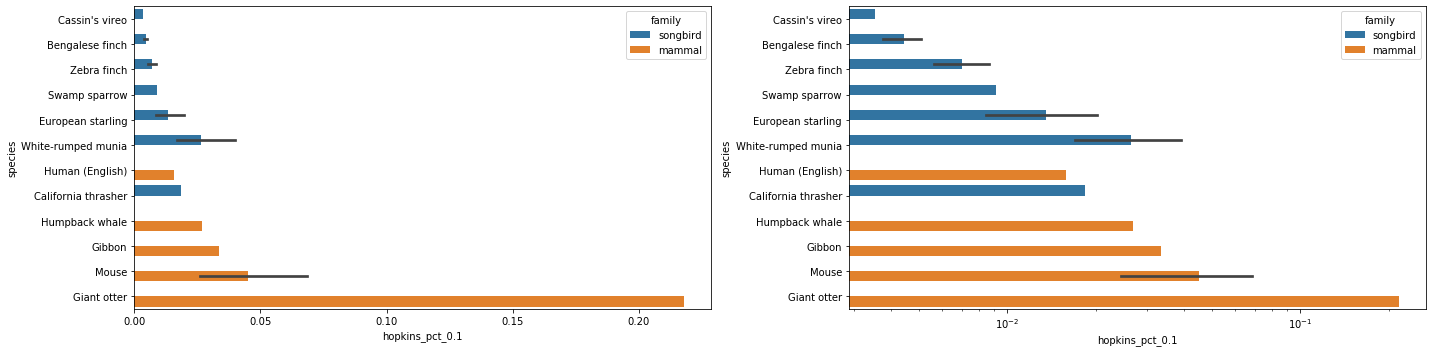

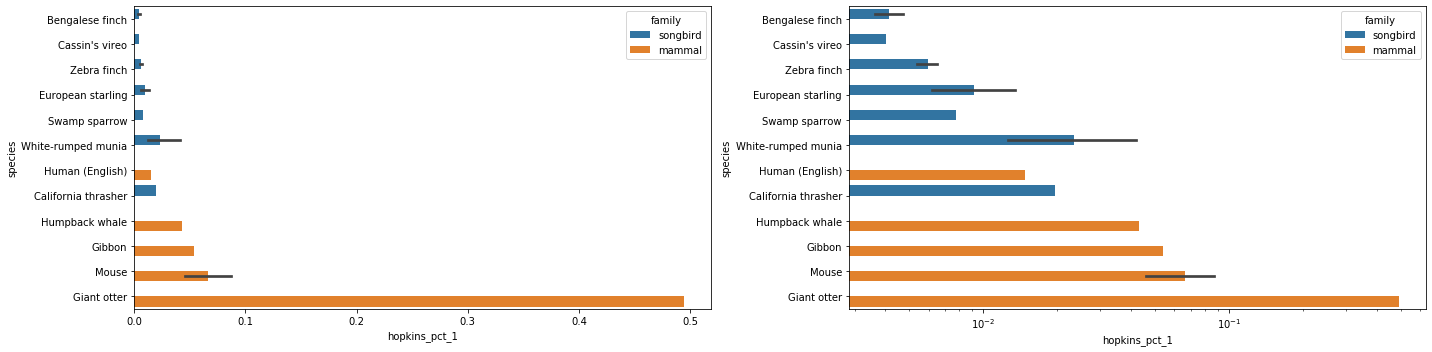

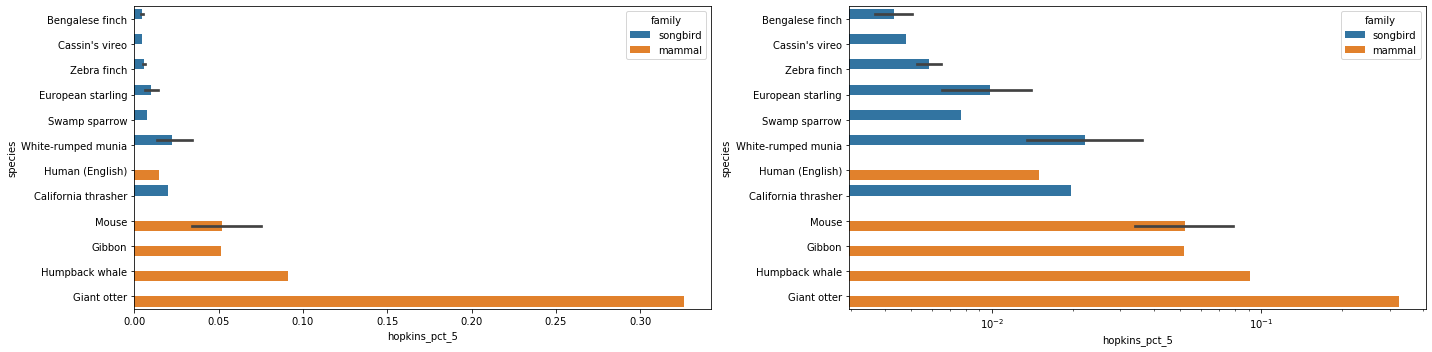

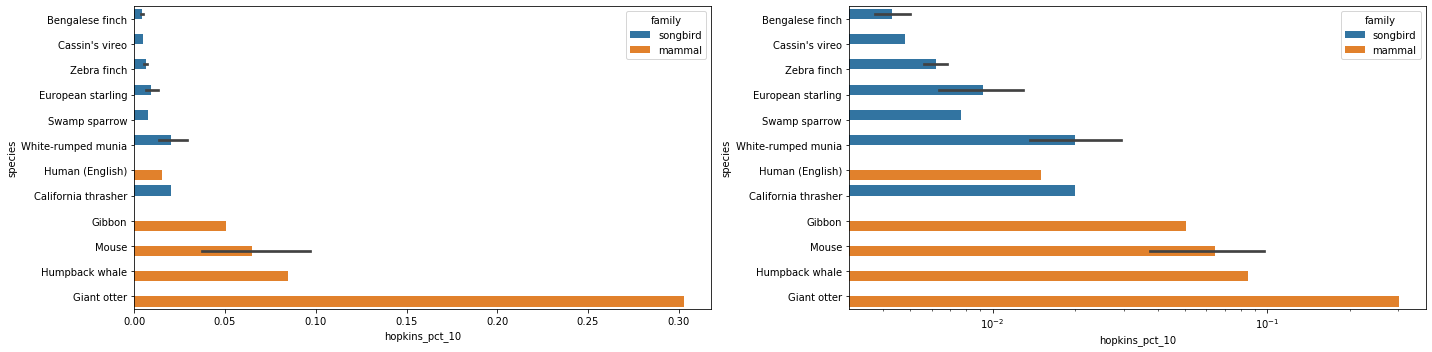

In [17]:
for metric in ['hopkins_10','hopkins_100','hopkins_pct_0.1','hopkins_pct_1','hopkins_pct_5','hopkins_pct_10']:
    result = clusterability_df.groupby(["species", 'family'])[metric].aggregate(np.median).reset_index().sort_values(metric)
    fig, axs = plt.subplots(ncols=2, figsize=(20,5))
    sns.barplot(x=metric,
                y="species",
                hue='family',
                data=clusterability_df.sort_values(by=[metric]),
                ax=axs[0],
                order = result['species']
               )
    
    sns.barplot(x=metric,
                y="species",
                hue='family',
                data=clusterability_df.sort_values(by=metric),
                ax=axs[1],
                order = result['species']
               )
    axs[1].set_xscale('log')
    plt.tight_layout()
    plt.show()